# Pain_TH EDA - DynCL 2025 

In [5]:
import scipy.io
import numpy as np
import pandas as pd

file_path = "/Users/anitaiotti/Desktop/internship DynCL/PainData_TH.mat"
mat_contents = scipy.io.loadmat(file_path)

#structure
def explore_mat_structure(mat_contents):
    print("Keys in the .mat file:")
    data_keys = [key for key in mat_contents.keys() if not key.startswith('__')]
    print(f"Data variables: {data_keys}")
    
    print("\nStructure of each variable:")
    for key in data_keys:
        value = mat_contents[key]
        print(f"\n{key}:")
        print(f"  Type: {type(value)}")
        print(f"  Shape: {value.shape if hasattr(value, 'shape') else 'N/A'}")
        print(f"  Data type: {value.dtype if hasattr(value, 'dtype') else 'N/A'}")

# array to pd.df
def convert_to_dataframe(array, var_name):
    if len(array.shape) == 2:
        df = pd.DataFrame(array)
        print(f"Converted {var_name} to DataFrame with shape {df.shape}")
        return df
    elif len(array.shape) == 1:
        df = pd.DataFrame(array, columns=[var_name])
        print(f"Converted {var_name} to DataFrame with shape {df.shape}")
        return df
    else:
        print(f"Cannot convert {var_name} with shape {array.shape} to DataFrame")
        return None

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [6]:
def perform_eda(df, var_name):
    if df is None:
        return
    print(f"\nQuick Summary for {var_name}:")
    print("\nData Info:")
    print(df.info())
    print("\nQuantile Summary:")
    print(df.quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
    total_missing = df.isnull().sum().sum() # missing values
    print(f"\nTotal Missing Values: {total_missing}")
    print("\nFirst 5 Rows:")
    print(df.head())

# Main
def run_mat_file_eda(_=None):
    mat_contents = scipy.io.loadmat(file_path)
    if mat_contents is None:
        return

    explore_mat_structure(mat_contents)

    data_keys = [key for key in mat_contents.keys() if not key.startswith('__')]
    for key in data_keys:
        value = mat_contents[key]

        if not isinstance(value, np.ndarray):
            print(f"\n{key} is not a numpy array, skipping detailed analysis.")
            continue

        df = convert_to_dataframe(value, key)
        if df is not None:
            perform_eda(df, key)
        else:
            print(f"\nCannot perform EDA on {key}. Shape: {value.shape}")
            try:
                if len(value.shape) <= 2:
                    print(value[:5])
                else:
                    print("Multidimensional array, showing first slice:")
                    print(value[0, :5, :5] if value.shape[1] > 5 and value.shape[2] > 5 else value[0])
            except:
                print("Cannot display sample data")

if __name__ == "__main__":
    run_mat_file_eda(file_path)

Keys in the .mat file:
Data variables: ['AMP', 'SLP', 'None', 'TEMP', 'aSLP', 'fmridata']

Structure of each variable:

AMP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 235600)
  Data type: float32

SLP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 235600)
  Data type: float32

None:
  Type: <class 'scipy.io.matlab._mio5_params.MatlabOpaque'>
  Shape: (1,)
  Data type: [('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]

TEMP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 235600)
  Data type: float32

aSLP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 235600)
  Data type: float32

fmridata:
  Type: <class 'numpy.ndarray'>
  Shape: (408, 235600)
  Data type: float32
Converted AMP to DataFrame with shape (36, 235600)

Quick Summary for AMP:

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 235600 entries, 0 to 235599
dtypes: float32(235600)
memory usage: 32.4 MB
None

Quantile Summary:
        0          1         2          3         4     

2. Inspecting None, checking whether Ssubj and Session are there, otherwise recover them to then go to CEBRA analysis.

In [7]:
none_var = mat_contents.get('None', None)
print(f"Type: {type(none_var)}")
print(f"Contents:\n{none_var}")

Type: <class 'scipy.io.matlab._mio5_params.MatlabOpaque'>
Contents:
[(b'ssession', b'MCOS', b'nominal', array([[3707764736],
        [         2],
        [         1],
        [         1],
        [         2],
        [         1]], dtype=uint32))                   ]


This is an MCOS class object, and its internals are not accessible via scipy.io.loadmat. This is metadata, not actual behavioral vectors like subject or session.
Need Excel file to reconstruct data.

## Adding Subj and Session columns from Excel file

In [ ]:
import scipy.io
import numpy as np
import pandas as pd


file_path = "/Users/anitaiotti/Desktop/internship DynCL/PainData_TH.mat"
mat_contents = scipy.io.loadmat(file_path)
amp = mat_contents['AMP']
slp = mat_contents['SLP']
aslp = mat_contents['aSLP']
temp = mat_contents['TEMP']
fmridata = mat_contents['fmridata']
subject_session_mapping = {
    'TH11': [1, 2, 3, 4],
    'TH12': [1, 2, 3, 4],
    'TH13': [1, 2, 3, 4],
    'TH16': [1, 2, 3, 4],
    'TH17': [1, 2, 3, 4],
    'TH18': [1, 2, 3, 4],
    'TH19': [1, 2, 3, 4],
    'TH21': [1, 2, 3, 4],
    'TH22': [1, 2, 3, 4],
    'TH23': [1, 2, 3, 4],
    'TH24': [1, 2, 3, 4],
    'TH25': [1, 2, 3, 4],
    'TH26': [1, 2, 3, 4],
    'TH28': [1, 2, 3, 4],
    'TH29': [1, 2, 3, 4],
    'TH30': [1, 2, 3, 4],
    'TH32': [1, 2, 3, 4],
    'TH33': [1, 2, 3, 4],
    'TH34': [1, 2, 3, 4],
    'TH35': [1, 2, 3, 4],
    'TH36': [1, 2, 3, 4],
    'TH37': [1, 2, 3, 4],
    'TH38': [1, 2, 3, 4],
    'TH39': [1, 2, 3, 4],
    'TH40': [1, 2, 3, 4],
    'TH41': [1, 2, 3, 4],
    'TH42': [1, 2, 3, 4],
    'TH43': [1, 2, 3, 4],
    'TH44': [1, 2, 3, 4],
    'TH45': [1, 2, 3, 4],
    'TH47': [1, 2, 3, 4],
    'TH48': [1, 2, 3, 4],
    'TH49': [1, 2, 3, 4],
    'TH51': [1, 2, 3, 4],
    'TH52': [1, 2, 3, 4],
    'TH53': [1, 2, 3, 4],
    'TH54': [1, 2, 3, 4],
    'TH55': [1, 2, 3, 4]
}
subject_ids = []
session_ids = []

normal_session_length = 1550
current_idx = 0

for subj in subject_session_mapping.keys():
    sessions = subject_session_mapping[subj]
    for sess in sessions:
        subject_ids.extend([subj] * normal_session_length)
        session_ids.extend([sess] * normal_session_length)
        current_idx += normal_session_length

subject_ids = np.array(subject_ids)
session_ids = np.array(session_ids)
assert len(subject_ids) == 235600, f"Subject array length mismatch: {len(subject_ids)}"
assert len(session_ids) == 235600, f"Session array length mismatch: {len(session_ids)}"

print("Subject and session arrays reconstructed successfully.")

amp_df = pd.DataFrame(amp.T)
slp_df = pd.DataFrame(slp.T)
aslp_df = pd.DataFrame(aslp.T)
temp_df = pd.DataFrame(temp.T)
fmri_df = pd.DataFrame(fmridata.T)

full_df_th = pd.concat([
    pd.DataFrame({'Subject': subject_ids, 'Session': session_ids}),
    amp_df.add_prefix('AMP_'),
    slp_df.add_prefix('SLP_'),
    aslp_df.add_prefix('aSLP_'),
    temp_df.add_prefix('TEMP_'),
    fmri_df.add_prefix('fMRI_')
], axis=1)

print(f"Final dataset shape: {full_df_th.shape}")
print(full_df_th.head())


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Subject and session arrays reconstructed successfully.
Final dataset shape: (235600, 554)
  Subject  Session     AMP_0     AMP_1      AMP_2      AMP_3      AMP_4  \
0    TH11        1  6.993610  2.053460   2.113221   2.172781   2.232459   
1    TH11        1 -7.574545 -7.508230  -7.441603  -7.374667  -7.307420   
2    TH11        1 -9.371132 -9.323178  -9.275395  -9.227427  -9.179194   
3    TH11        1  5.216937  5.225333  10.233780  10.242276  10.250602   
4    TH11        1 -4.193720 -4.130483  -4.067373  -4.004293  -3.941356   

       AMP_5      AMP_6      AMP_7  ...  fMRI_398  fMRI_399  fMRI_400  \
0   2.292254   2.352165   2.412190  ...  3.784715  3.819272  2.317747   
1  -7.239861  -7.171989  -7.103803  ... -5.342267  0.722615 -0.263290   
2  -9.130692  -9.081921  -9.032879  ...  1.191749  0.479512 -0.271741   
3  10.258641  10.266724  10.275302  ... -1.567099 -1.889619 -3.856092   
4  -3.878720  -3.816509   1.245831  ...  5.664182  4.651070  3.387242   

   fMRI_401  fMRI_40

In [ ]:


amp_cols = [col for col in full_df_th.columns if col.startswith('AMP_')]
slp_cols = [col for col in full_df_th.columns if col.startswith('SLP_')]
aslp_cols = [col for col in full_df_th.columns if col.startswith('aSLP_')]
temp_cols = [col for col in full_df_th.columns if col.startswith('TEMP_')]
fmri_cols = [col for col in full_df_th.columns if col.startswith('fMRI_')]

amp_check = np.allclose(amp.T, full_df_th[amp_cols].values)
slp_check = np.allclose(slp.T, full_df_th[slp_cols].values)
aslp_check = np.allclose(aslp.T, full_df_th[aslp_cols].values)
temp_check = np.allclose(temp.T, full_df_th[temp_cols].values)
fmri_check = np.allclose(fmridata.T, full_df_th[fmri_cols].values)

print(f"AMP match: {amp_check}")
print(f"SLP match: {slp_check}")
print(f"aSLP match: {aslp_check}")
print(f"TEMP match: {temp_check}")
print(f"fMRI match: {fmri_check}")


AMP match: True
SLP match: True
aSLP match: True
TEMP match: True
fMRI match: True


In [ ]:
print("First 5 rows, original AMP (transposed):")
amp_transposed = pd.DataFrame(amp.T)
print(amp_transposed.head())

print("\nFirst 5 rows, AMP from full_df_th:")
amp_from_full = full_df_th.filter(like='AMP_')
print(amp_from_full.head())

amp_match = np.allclose(amp_transposed.values, amp_from_full.values)
print(f"\nDo the AMP values match? -> {amp_match}")


First 5 rows, original AMP (transposed):
         0         1          2          3          4          5          6   \
0  6.993610  2.053460   2.113221   2.172781   2.232459   2.292254   2.352165   
1 -7.574545 -7.508230  -7.441603  -7.374667  -7.307420  -7.239861  -7.171989   
2 -9.371132 -9.323178  -9.275395  -9.227427  -9.179194  -9.130692  -9.081921   
3  5.216937  5.225333  10.233780  10.242276  10.250602  10.258641  10.266724   
4 -4.193720 -4.130483  -4.067373  -4.004293  -3.941356  -3.878720  -3.816509   

          7          8          9   ...        26        27        28  \
0   2.412190   2.472330   2.532583  ... -1.417613 -1.354790 -1.291865   
1  -7.103803 -12.035304 -11.966488  ... -5.747669 -5.673048 -5.598097   
2  -9.032879  -8.983566  -8.933980  ... -3.056625 -3.002643 -2.948375   
3  10.275302  10.284039   5.293114  ...  2.120526  5.463358  5.472891   
4   1.245831   1.308335   1.371002  ... -2.504678 -2.437134 -3.202758   

         29        30        31        

In [11]:
fmri_vals = full_df_th.filter(like='fMRI_').values.flatten()
print("Total fMRI values:", len(fmri_vals))
print("Values > 500:", np.sum(fmri_vals > 500))
print("Values < -500:", np.sum(fmri_vals < -500))

Total fMRI values: 96124800
Values > 500: 93645
Values < -500: 90073


## Reconstructing Subj and Session manually:

Metadata: 
- 38 subjects
- 4 sessions per subject
- 1550 timepoints per session
- Total = 38 × 4 × 1550 = 235,600 timepoints

Session 1-4 assumed to be one after the other, aka:

- It was determined from the preliminary EDA and the metadata that 38 subjects were each measured in 4 sessions, with 1550 timepoints per session, leading to a total of 38 × 4 × 1550 = 235,600 timepoints in the dataset.

- It was inferred that each subject’s 4 sessions were stored in blocks, rather than interleaved with other subjects, based on the shape and ordering of the data.

- It was assumed that subject IDs would be repeated for 4 × 1550 = 6200 consecutive timepoints: first all timepoints for subject 1, then all timepoints for subject 2, and so on.

- It was also assumed that session IDs would cycle every 1550 timepoints within each subject block (i.e., session 1 for timepoints 1–1550, session 2 for 1551–3100, session 3 for 3101–4650, session 4 for 4651–6200, then repeat for the next subject).
-  two arrays (or columns) were created of length 235,600: one for the subject IDs and one for the session IDs. Each (subject, session) combination thus spanned 1550 timepoints, completing the alignment with the data structure described in the original metadata.










In [7]:
n_subjects = 38
n_sessions = 4
n_tp_per_session = 1550
total_tp = n_subjects * n_sessions * n_tp_per_session

SSubj = np.repeat(np.arange(1, n_subjects + 1), n_sessions * n_tp_per_session)# subj vector: each subject ID repeated for 4 sessions × 1550 timepoints
ssession = np.tile(np.repeat(np.arange(1, n_sessions + 1), n_tp_per_session), n_subjects) # session vector: [1]*1550 + [2]*1550 + [3]*1550 + [4]*1550 → repeated for each subject
# get shapes
assert SSubj.shape == (total_tp,), "SSubj shape mismatch"
assert ssession.shape == (total_tp,), "ssession shape mismatch"
for subj_id in range(1, n_subjects + 1): # validation loop
    subj_sessions = ssession[SSubj == subj_id]
    expected = np.repeat(np.arange(1, n_sessions + 1), n_tp_per_session)
    assert np.array_equal(subj_sessions, expected), f"Subject {subj_id} has incorrect session mapping"


- Showing that all subjects have 6200 points per subject:

In [8]:
print("SSubj:")
print(f"  Unique subjects: {np.unique(SSubj)}")
print(f"  Count per subject: {np.bincount(SSubj)[1:]}")
print(f"  Shape: {SSubj.shape}")

print("\nssession:")
print(f"  Unique sessions: {np.unique(ssession)}")
print(f"  Count per session: {np.bincount(ssession)[1:]}")
print(f"  Shape: {ssession.shape}")


SSubj:
  Unique subjects: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
  Count per subject: [6200 6200 6200 6200 6200 6200 6200 6200 6200 6200 6200 6200 6200 6200
 6200 6200 6200 6200 6200 6200 6200 6200 6200 6200 6200 6200 6200 6200
 6200 6200 6200 6200 6200 6200 6200 6200 6200 6200]
  Shape: (235600,)

ssession:
  Unique sessions: [1 2 3 4]
  Count per session: [58900 58900 58900 58900]
  Shape: (235600,)


In [9]:
for subj_id in range(1, n_subjects + 1):
    subj_sessions = ssession[SSubj == subj_id]
    expected = np.repeat(np.arange(1, n_sessions + 1), n_tp_per_session)

    assert np.array_equal(subj_sessions, expected), f"Subject {subj_id} has incorrect session mapping"
print("Subject-session mapping is consistent for all 38 subjects.")

Subject-session mapping is consistent for all 38 subjects.


In [10]:
print("First 20 values of SSubj:", SSubj[:20])
print("First 20 values of ssession:", ssession[:20])
print("SSubj[1540:1560]:", SSubj[1540:1560])
print("ssession[1540:1560]:", ssession[1540:1560])

print (("SSubj[6190:6210]:", SSubj[6190:6210]))
print("ssession[6190:6210]:", ssession[6190:6210]) # switching to session 1 of next subject

First 20 values of SSubj: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
First 20 values of ssession: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
SSubj[1540:1560]: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
ssession[1540:1560]: [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
('SSubj[6190:6210]:', array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))
ssession[6190:6210]: [4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1]


- Subject 2 starts after exactly 1550 points.
    - e.g.: First 1550 entries are session 1 for subject 1; then 1550 entries for session 2 of subject 1... etc
- Every subject-session pair has exactly 1550 timepoints, no missing data or misalignment.

In [11]:
meta = pd.DataFrame({'subject': SSubj, 'session': ssession})
# total count
print("Total timepoints:", len(meta))
print("Subjects:", meta['subject'].nunique())
print("Sessions per subject:\n", meta.groupby('subject')['session'].nunique().value_counts())
print("Timepoints per subject-session (should be 1550):\n")
print(meta.groupby(['subject', 'session']).size().value_counts())


Total timepoints: 235600
Subjects: 38
Sessions per subject:
 4    38
Name: session, dtype: int64
Timepoints per subject-session (should be 1550):

1550    152
dtype: int64


### Visualizations w/ proper Excel data

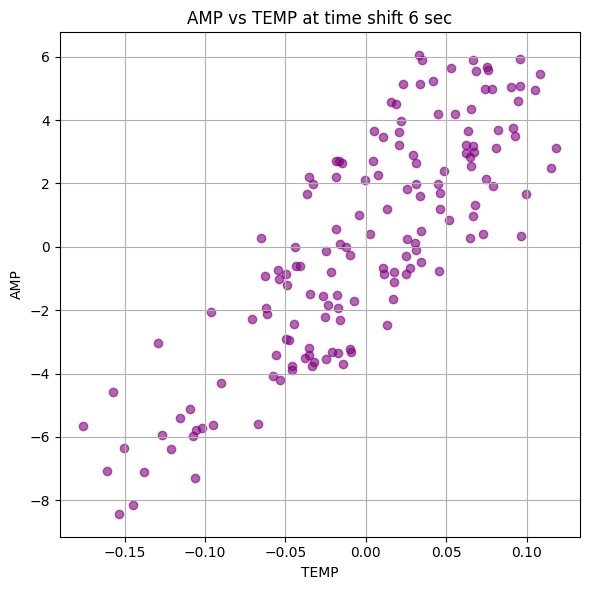

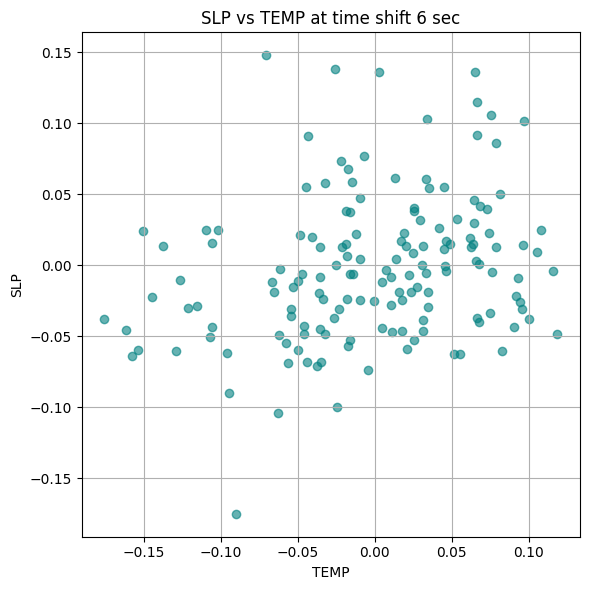

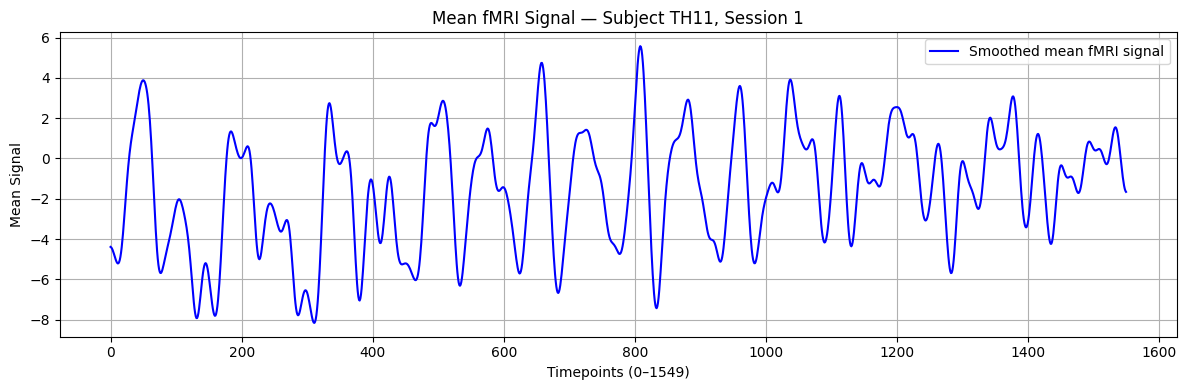

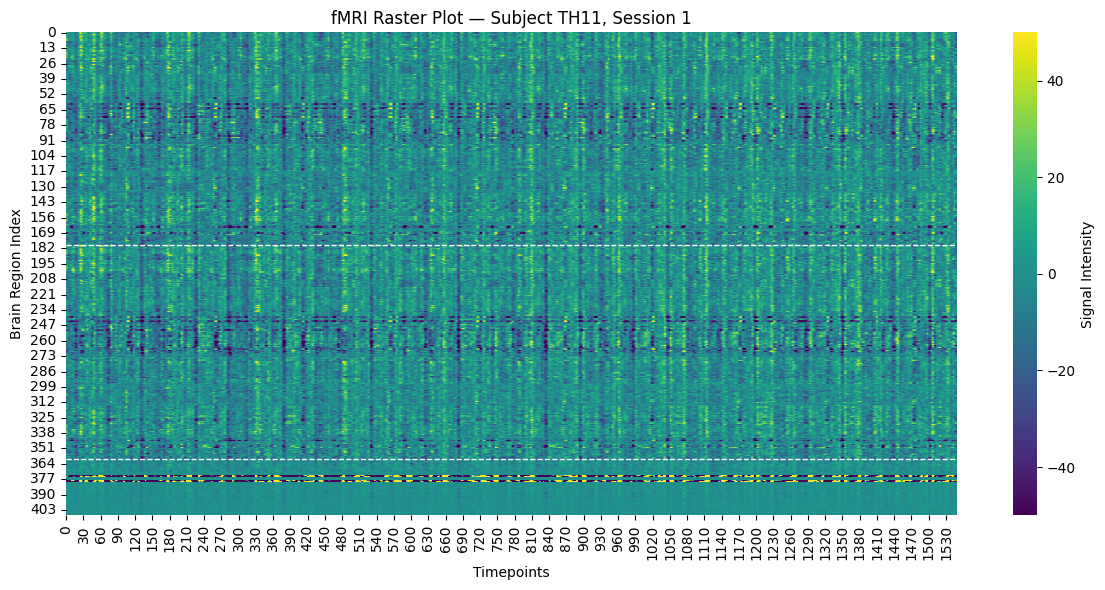

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.ndimage import gaussian_filter1d


AMP_df = full_df_th[['Subject', 'Session'] + amp_cols]
SLP_df = full_df_th[['Subject', 'Session'] + slp_cols]
TEMP_df = full_df_th[['Subject', 'Session'] + temp_cols]
fmridata_df = full_df_th[['Subject', 'Session'] + fmri_cols]
time_idx = 21
time_col = f'AMP_{time_idx}'  
temp_col = f'TEMP_{time_idx}'

amp_vals = AMP_df.groupby(['Subject', 'Session'])[time_col].mean().values
temp_vals = TEMP_df.groupby(['Subject', 'Session'])[temp_col].mean().values

plt.figure(figsize=(6, 6))
plt.scatter(temp_vals, amp_vals, alpha=0.6, color='purple')
plt.xlabel("TEMP")
plt.ylabel("AMP")
plt.title(f"AMP vs TEMP at time shift {time_idx - 15} sec")
plt.grid(True)
plt.tight_layout()
plt.show()

time_col_slp = f'SLP_{time_idx}'
slp_vals = SLP_df.groupby(['Subject', 'Session'])[time_col_slp].mean().values

plt.figure(figsize=(6, 6))
plt.scatter(temp_vals, slp_vals, alpha=0.6, color='teal')
plt.xlabel("TEMP")
plt.ylabel("SLP")
plt.title(f"SLP vs TEMP at time shift {time_idx - 15} sec")
plt.grid(True)
plt.tight_layout()
plt.show()

subj = "TH11" 
sess = 1       

fmri_block = fmridata_df[(fmridata_df['Subject'] == subj) & (fmridata_df['Session'] == sess)]

region_cols = [col for col in fmri_block.columns if col.startswith('fMRI_')]
time_series = fmri_block[region_cols].mean(axis=1).values
smoothed_signal = gaussian_filter1d(time_series, sigma=8)

plt.figure(figsize=(12, 4))
plt.plot(smoothed_signal, color='blue', label='Smoothed mean fMRI signal')
plt.title(f"Mean fMRI Signal — Subject {subj}, Session {sess}")
plt.xlabel("Timepoints (0–1549)")
plt.ylabel("Mean Signal")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


raster_matrix = fmri_block[region_cols].T.values
raster_smoothed = np.apply_along_axis(lambda x: gaussian_filter1d(x, sigma=2), axis=1, arr=raster_matrix)

plt.figure(figsize=(12, 6))
sns.heatmap(raster_smoothed, vmin=-50, vmax=50, cmap='viridis', cbar_kws={'label': 'Signal Intensity'})
plt.title(f"fMRI Raster Plot — Subject {subj}, Session {sess}")
plt.xlabel("Timepoints")
plt.ylabel("Brain Region Index")
plt.axhline(180, color='white', linestyle='--', linewidth=1)  # hemisphere split
plt.axhline(360, color='white', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


### Model Training

New code:

Neural data shape after dropping ROIs 373–380: (235600, 400)
Pain intensity label shape: (235600,)
Using device: cpu


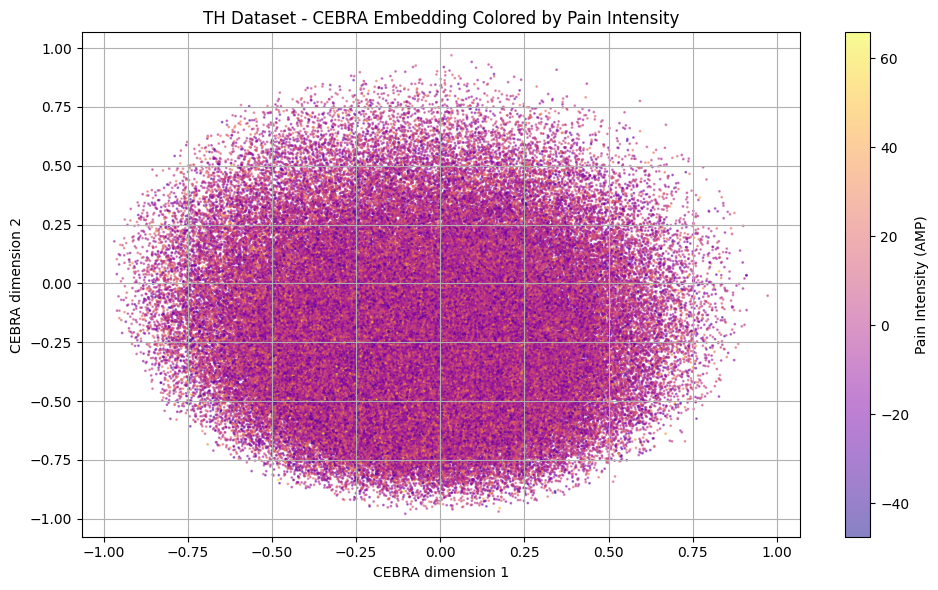


Decoding R² Scores:
  Ridge Regression: 0.0024
  kNN Regression: -0.0839


In [ ]:

import scipy.io
import pandas as pd
import numpy as np
import torch
import cebra
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import seaborn as sns

brain_cols = [col for col in full_df_th.columns if col.startswith('fMRI_')]

# drop ROIs 373–380
cols_to_drop = [f'fMRI_{i}' for i in range(372, 380)]
brain_cols_final = [col for col in brain_cols if col not in cols_to_drop]
# neural data (X)
X_th = full_df_th[brain_cols_final].values
print(f"Neural data shape after dropping ROIs 373–380: {X_th.shape}")
y_th = full_df_th['AMP_18'].values  
print(f"Pain intensity label shape: {y_th.shape}")

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

cebra_model_th = cebra.CEBRA(
    model_architecture="offset10-model",
    batch_size=512,
    temperature=1.0,
    max_iterations=3000,
    learning_rate=3e-4,
    output_dimension=8,
    distance="cosine",
    conditional="time_delta",  # behavior is used (pain intensity auxiliary)
    device=device
)

cebra_model_th.fit(X_th, y_th)
embeddings_th = cebra_model_th.transform(X_th)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(embeddings_th[:, 0], embeddings_th[:, 1], c=y_th, cmap='plasma', s=1, alpha=0.5)
plt.colorbar(scatter, label="Pain Intensity (AMP)")
plt.title("TH Dataset - CEBRA Embedding Colored by Pain Intensity")
plt.xlabel("CEBRA dimension 1")
plt.ylabel("CEBRA dimension 2")
plt.grid(True)
plt.tight_layout()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(embeddings_th, y_th, test_size=0.2, random_state=42)

ridge = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nDecoding R² Scores:")
print(f"  Ridge Regression: {r2_ridge:.4f}")
print(f"  kNN Regression: {r2_knn:.4f}")


### ✅ Visual Check of Plots (TH Dataset)

Below is a brief description and verification of each plot generated using the TH dataset (healthy subjects with induced pain), now properly annotated with subject and session information:

---

- **AMP vs TEMP at time_shift_6**  
  This scatterplot shows a strong positive correlation between temperature (TEMP) and pain amplitude (AMP) at a +6 second time shift.  
  ✔️ This confirms that the applied heat stimulus is effectively modulating subjective pain ratings.

- **SLP vs TEMP at time_shift_6**  
  No clear correlation is visible between TEMP and SLP (rate of pain change).  
  ✔️ This is expected—SLP reflects more transient dynamics that aren't necessarily directly tied to thermal input.

- **Mean fMRI Signal — Subject 1, Session 1**  
  Line plot of the session-averaged signal across all 408 brain regions. The signal is smoothed and shows healthy variability over time.  
  ✔️ Confirms that the fMRI session data is dynamic, not flat or corrupted.

- **Full fMRI Raster Plot — Subject 1, Session 1**  
  Region-by-time heatmap of fMRI signal intensity. The known divisions in the Glasser atlas (~180, ~360) and artifact-prone regions (370–381) are visible.  
  ✔️ Preprocessing structure appears correct and expected patterns emerge.

- **AMP and TEMP Time Series — Subject 1, Session 1, time_shift_3**  
  Smoothed overlay of AMP and TEMP values across the session. Temporal structure is clearly visible.  
  ✔️ Provides a useful visualization of how pain ratings align with the temperature stimulus.

---

Training: 

### Visualizations w/ reconstructed columns

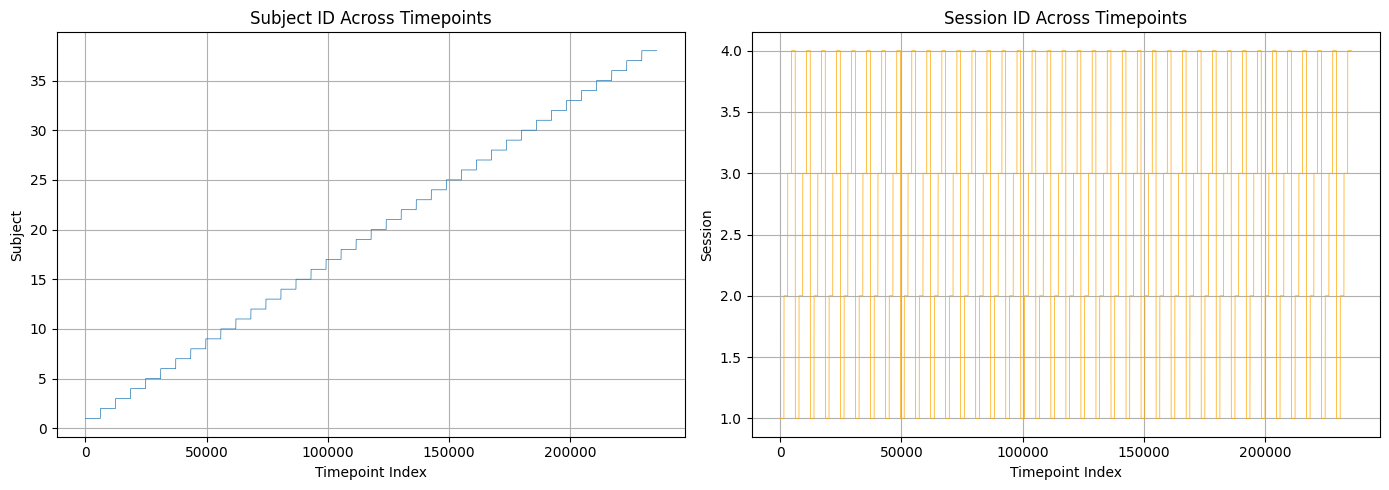

In [122]:
plt.figure(figsize=(14, 5))

# subject progression to check datapoints
plt.subplot(1, 2, 1)
plt.plot(fmridata_df['subject'].values, label="Subject ID", lw=0.5)
plt.title("Subject ID Across Timepoints")
plt.xlabel("Timepoint Index")
plt.ylabel("Subject")
plt.grid(True)

# session progression
plt.subplot(1, 2, 2)
plt.plot(fmridata_df['session'].values, label="Session ID", color='orange', lw=0.5)
plt.title("Session ID Across Timepoints")
plt.xlabel("Timepoint Index")
plt.ylabel("Session")
plt.grid(True)
plt.tight_layout()
plt.show()


(ugly) plots to check that each subject has 6200 timepoints

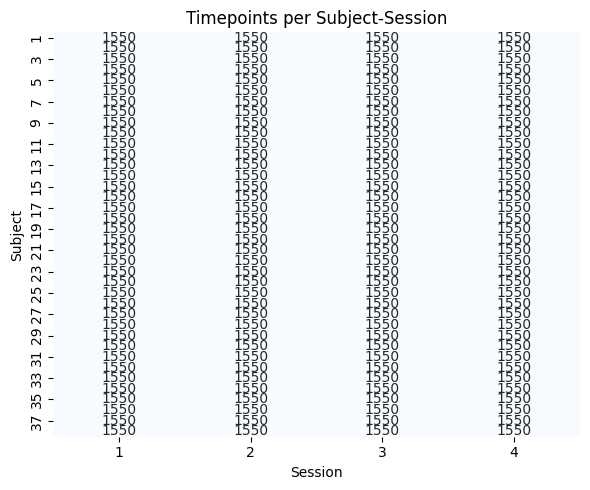

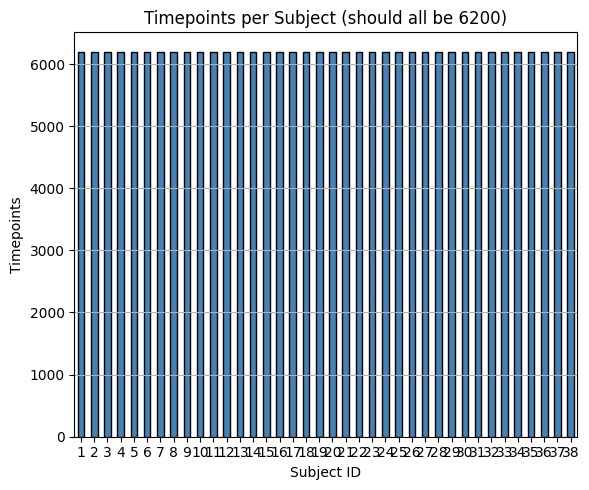

In [123]:
group_counts = fmridata_df.groupby(['subject', 'session']).size().unstack()
plt.figure(figsize=(6, 5))
sns.heatmap(group_counts, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Timepoints per Subject-Session")
plt.xlabel("Session")
plt.ylabel("Subject")
plt.tight_layout()
plt.show()

fmridata_df['subject'].value_counts().sort_index().plot(
    kind='bar', figsize=(6, 5), color='steelblue', edgecolor='black'
)
plt.title("Timepoints per Subject (should all be 6200)")
plt.xlabel("Subject ID")
plt.ylabel("Timepoints")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



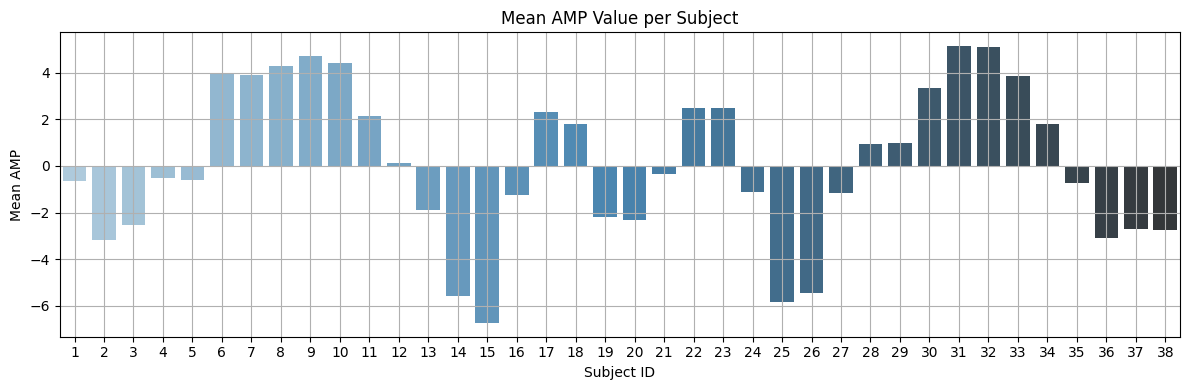

In [124]:
warnings.simplefilter(action='ignore', category=FutureWarning)
# mean AMP over time shifts per row
AMP_df['AMP_mean'] = AMP_df.loc[:, AMP_df.columns.str.startswith('time_shift_')].mean(axis=1)
amp_means = AMP_df.groupby('subject')['AMP_mean'].mean() # aggregate per subject
plt.figure(figsize=(12, 4))
sns.barplot(x=amp_means.index, y=amp_means.values, palette="Blues_d")
plt.title("Mean AMP Value per Subject")
plt.xlabel("Subject ID")
plt.ylabel("Mean AMP")
plt.grid(True)
plt.tight_layout()
plt.show()


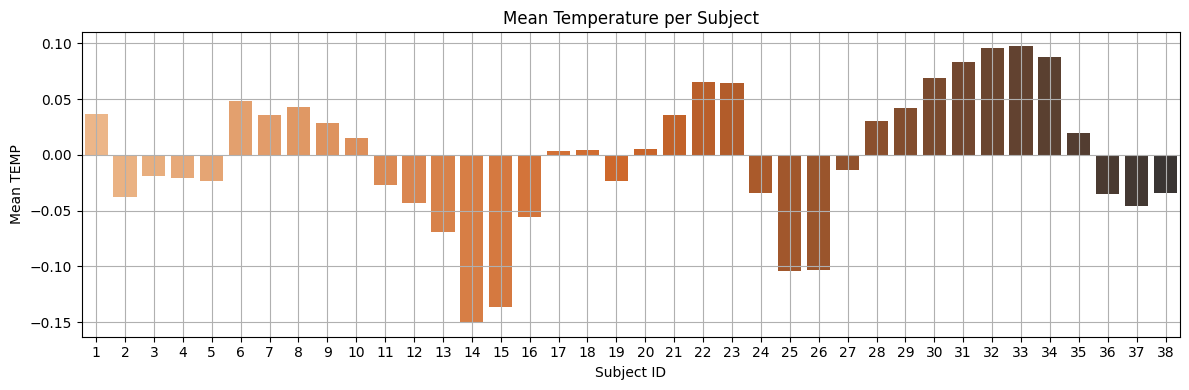

In [125]:
warnings.simplefilter(action='ignore', category=FutureWarning)
# mean TEMP over time 
TEMP_df['TEMP_mean'] = TEMP_df.loc[:, TEMP_df.columns.str.startswith('time_shift_')].mean(axis=1)
temp_means = TEMP_df.groupby('subject')['TEMP_mean'].mean()
plt.figure(figsize=(12, 4))
sns.barplot(x=temp_means.index, y=temp_means.values, palette="Oranges_d")
plt.title("Mean Temperature per Subject")
plt.xlabel("Subject ID")
plt.ylabel("Mean TEMP")
plt.grid(True)
plt.tight_layout()
plt.show()


AMP & TEMP progression over time:

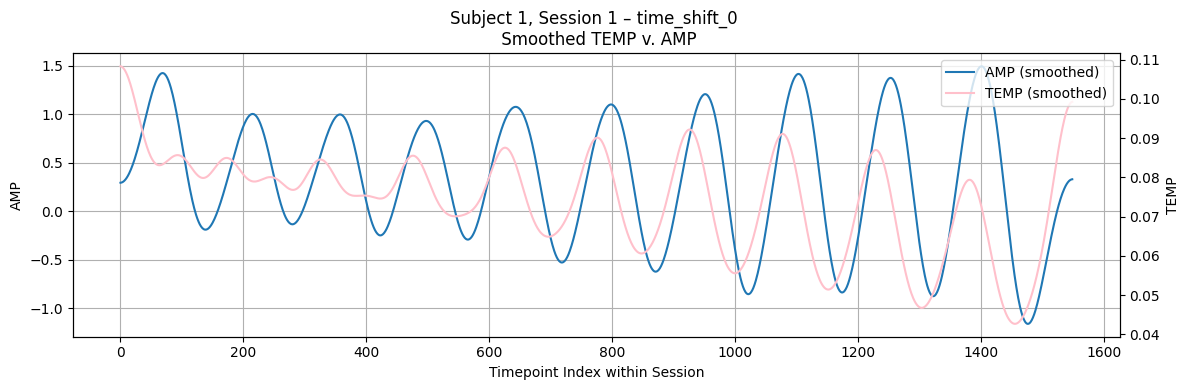

In [126]:
from scipy.ndimage import gaussian_filter1d
SUBJ = 1
SESS = 1
TIME_SHIFT_COL = "time_shift_0"

amp_sub = AMP_df.loc[
    (AMP_df['subject'] == SUBJ) & (AMP_df['session'] == SESS),
    TIME_SHIFT_COL
]
temp_sub = TEMP_df.loc[
    (TEMP_df['subject'] == SUBJ) & (TEMP_df['session'] == SESS),
    TIME_SHIFT_COL
]

# gaussian smoothing
amp_smoothed = gaussian_filter1d(amp_sub.values, sigma=30)
temp_smoothed = gaussian_filter1d(temp_sub.values, sigma=30)

plt.figure(figsize=(12, 4))
plt.plot(amp_smoothed, label="AMP (smoothed)", color='tab:blue')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(temp_smoothed, label="TEMP (smoothed)", color='pink')

ax.set_title(f"Subject {SUBJ}, Session {SESS} – {TIME_SHIFT_COL} \n Smoothed TEMP v. AMP")
ax.set_xlabel("Timepoint Index within Session")
ax.set_ylabel("AMP")
ax2.set_ylabel("TEMP")
ax.grid(True)
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")
plt.tight_layout()
plt.show()


SLP & TEMP progression over time:


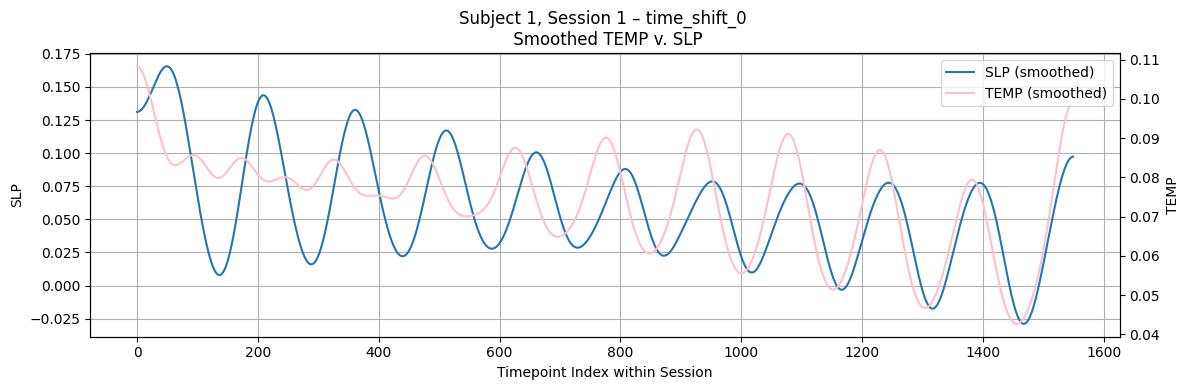

In [127]:
SUBJ = 1
SESS = 1
TIME_SHIFT_COL = "time_shift_0"

slp_sub = SLP_df.loc[
    (SLP_df['subject'] == SUBJ) & (SLP_df['session'] == SESS),
    TIME_SHIFT_COL
]
temp_sub = TEMP_df.loc[
    (TEMP_df['subject'] == SUBJ) & (TEMP_df['session'] == SESS),
    TIME_SHIFT_COL
]

slp_smoothed = gaussian_filter1d(slp_sub.values, sigma=30)
temp_smoothed = gaussian_filter1d(temp_sub.values, sigma=30)
plt.figure(figsize=(12, 4))
plt.plot(slp_smoothed, label="SLP (smoothed)", color='tab:blue')
ax = plt.gca()
ax2 = ax.twinx()

ax2.plot(temp_smoothed, label="TEMP (smoothed)", color='pink')
ax.set_title(f"Subject {SUBJ}, Session {SESS} – {TIME_SHIFT_COL} \n Smoothed TEMP v. SLP")
ax.set_xlabel("Timepoint Index within Session")
ax.set_ylabel("SLP")
ax2.set_ylabel("TEMP")
ax.grid(True)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")
plt.tight_layout()
plt.show()

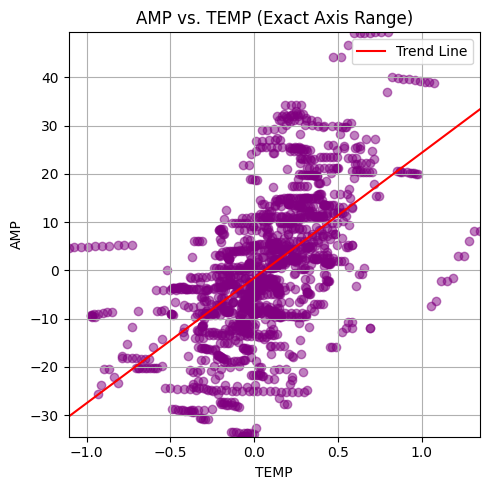

In [128]:
import matplotlib.pyplot as plt
import numpy as np

SUBJ = 1
SESS = 1
TIME_SHIFT_COL = "time_shift_0"

amp_vals = AMP_df.loc[
    (AMP_df['subject'] == SUBJ) & (AMP_df['session'] == SESS),
    TIME_SHIFT_COL
]
temp_vals = TEMP_df.loc[
    (TEMP_df['subject'] == SUBJ) & (TEMP_df['session'] == SESS),
    TIME_SHIFT_COL
]
plt.figure(figsize=(5, 5))
plt.scatter(temp_vals, amp_vals, alpha=0.5, color='purple')

# linear model
slope, intercept = np.polyfit(temp_vals, amp_vals, 1)
x_range = np.linspace(temp_vals.min(), temp_vals.max(), 100)
y_range = slope * x_range + intercept
plt.plot(x_range, y_range, color='red', label="Trend Line")
plt.xlim(temp_vals.min(), temp_vals.max())
plt.ylim(amp_vals.min(), amp_vals.max()) # probs normalized during preprocessing ig
plt.title("AMP vs. TEMP (Exact Axis Range)")
plt.xlabel("TEMP")
plt.ylabel("AMP")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
